In [1]:
import matplotlib.pyplot as plt
plt.style.use('jupyter_dark')
figsize = plt.rcParams['figure.figsize']

In [2]:
import networkx as nx
import numpy as np
import math
from interarray.farmrepo_landscape import g
from interarray.geometric import A_graph
from interarray.plotting import gplot

In [3]:
# from interarray.MILP.pyomo import make_MILP_length, MILP_solution_to_G
from interarray.MILP.ortools import make_MILP_length, MILP_solution_to_G, cp_model

## rbs, k = 5, branching

In [34]:
G_base = g.rbs

In [35]:
k = 5
A = A_graph(G_base)
m = make_MILP_length(
    A, k, 
    gateXings_constraint = True,
    gates_limit = True,
    branching = True,
    # branching = False,
)

In [36]:
solver = cp_model.CpSolver()

In [37]:
# https://github.com/google/or-tools/blob/stable/ortools/sat/sat_parameters.proto
# solver.parameters.log_search_progress = True
# solver.parameters.num_search_workers = 16
solver.parameters.max_time_in_seconds = 30
solver.parameters.relative_gap_limit = 0.01
# solver.parameters.hint_conflict_limit = 50000
# solver.parameters.cp_model_probing_level = 4
# solver.parameters.max_presolve_iterations = 12

In [38]:
status = solver.Solve(m)
print(solver.ResponseStats(),
      f"\nbest solution's strategy: {solver.SolutionInfo()}",
      f'\ngap: {100*(solver.ObjectiveValue() - solver.BestObjectiveBound())/solver.BestObjectiveBound():.1f}%')

CpSolverResponse summary:
status: FEASIBLE
objective: 88462.07380934329
best_bound: 87020.64859062812
integers: 588
booleans: 909
conflicts: 908
branches: 4182
propagations: 74530
integer_propagations: 111328
restarts: 1510
lp_iterations: 140918
walltime: 30.1163
usertime: 30.1163
deterministic_time: 183.52
gap_integral: 1342.49
solution_fingerprint: 0x107c677a61e91b55
 
best solution's strategy: rins_lns_default_lp(d=0.98 s=357 t=0.10 p=0.53) 
gap: 1.7%


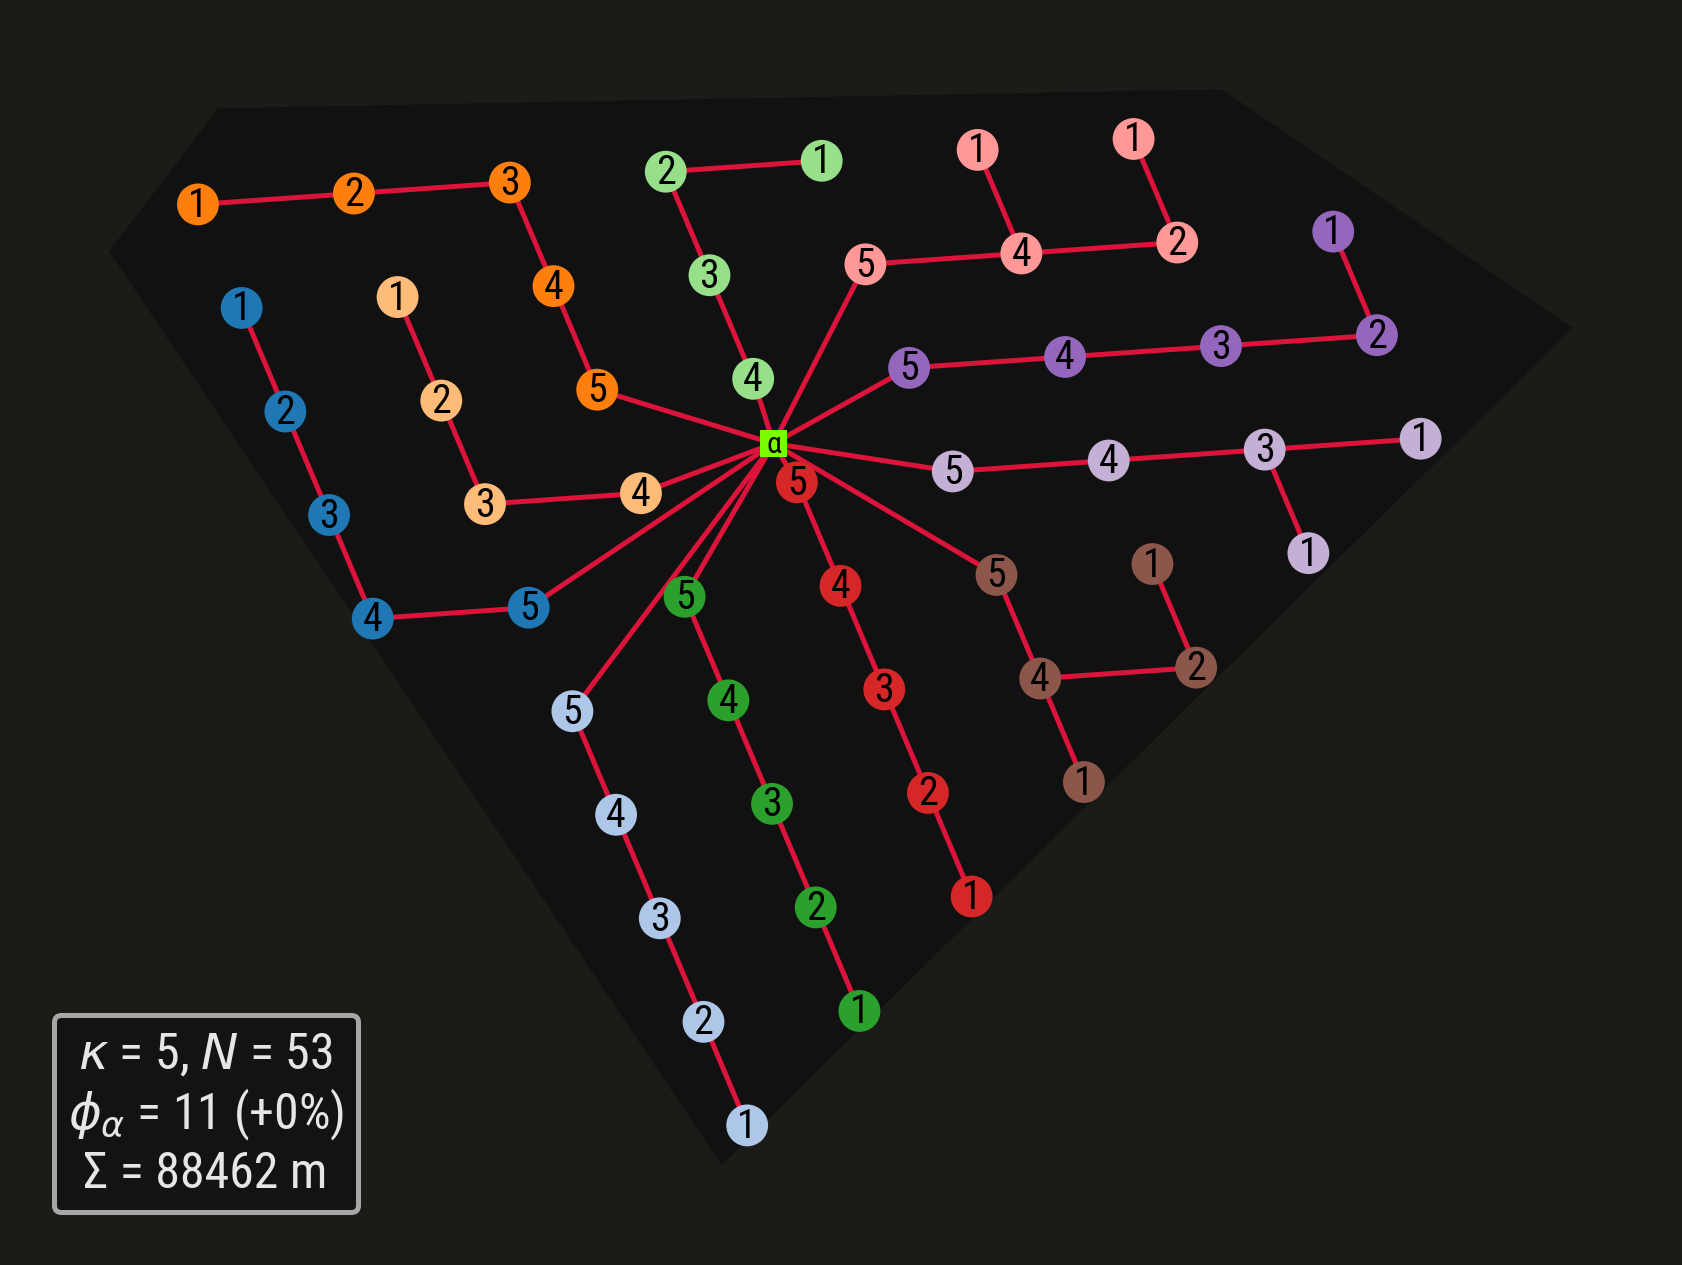

In [39]:
G = MILP_solution_to_G(solver, m, A)
gplot(G);

## dantysk, k = 7, branching

In [10]:
G_base = g.dantysk

In [11]:
k = 7
A = A_graph(G_base)
m = make_MILP_length(A, k, 
                     gateXings_constraint = True,
                     gates_limit = True,
                     branching = True)

In [12]:
solver = cp_model.CpSolver()

In [13]:
# https://github.com/google/or-tools/blob/stable/ortools/sat/sat_parameters.proto
# solver.parameters.log_search_progress = True
# solver.parameters.num_search_workers = 16
solver.parameters.max_time_in_seconds = 30
solver.parameters.relative_gap_limit = 0.01
# solver.parameters.hint_conflict_limit = 50000
# solver.parameters.cp_model_probing_level = 4
# solver.parameters.max_presolve_iterations = 12

In [14]:
status = solver.Solve(m)
print(solver.ResponseStats())

CpSolverResponse summary:
status: FEASIBLE
objective: 105171.7877819626
best_bound: 98973.42022258288
integers: 801
booleans: 1347
conflicts: 932
branches: 4828
propagations: 83218
integer_propagations: 103542
restarts: 2027
lp_iterations: 120368
walltime: 29.9345
usertime: 29.9345
deterministic_time: 177.187
gap_integral: 1571.35
solution_fingerprint: 0xa0f576ca17209022



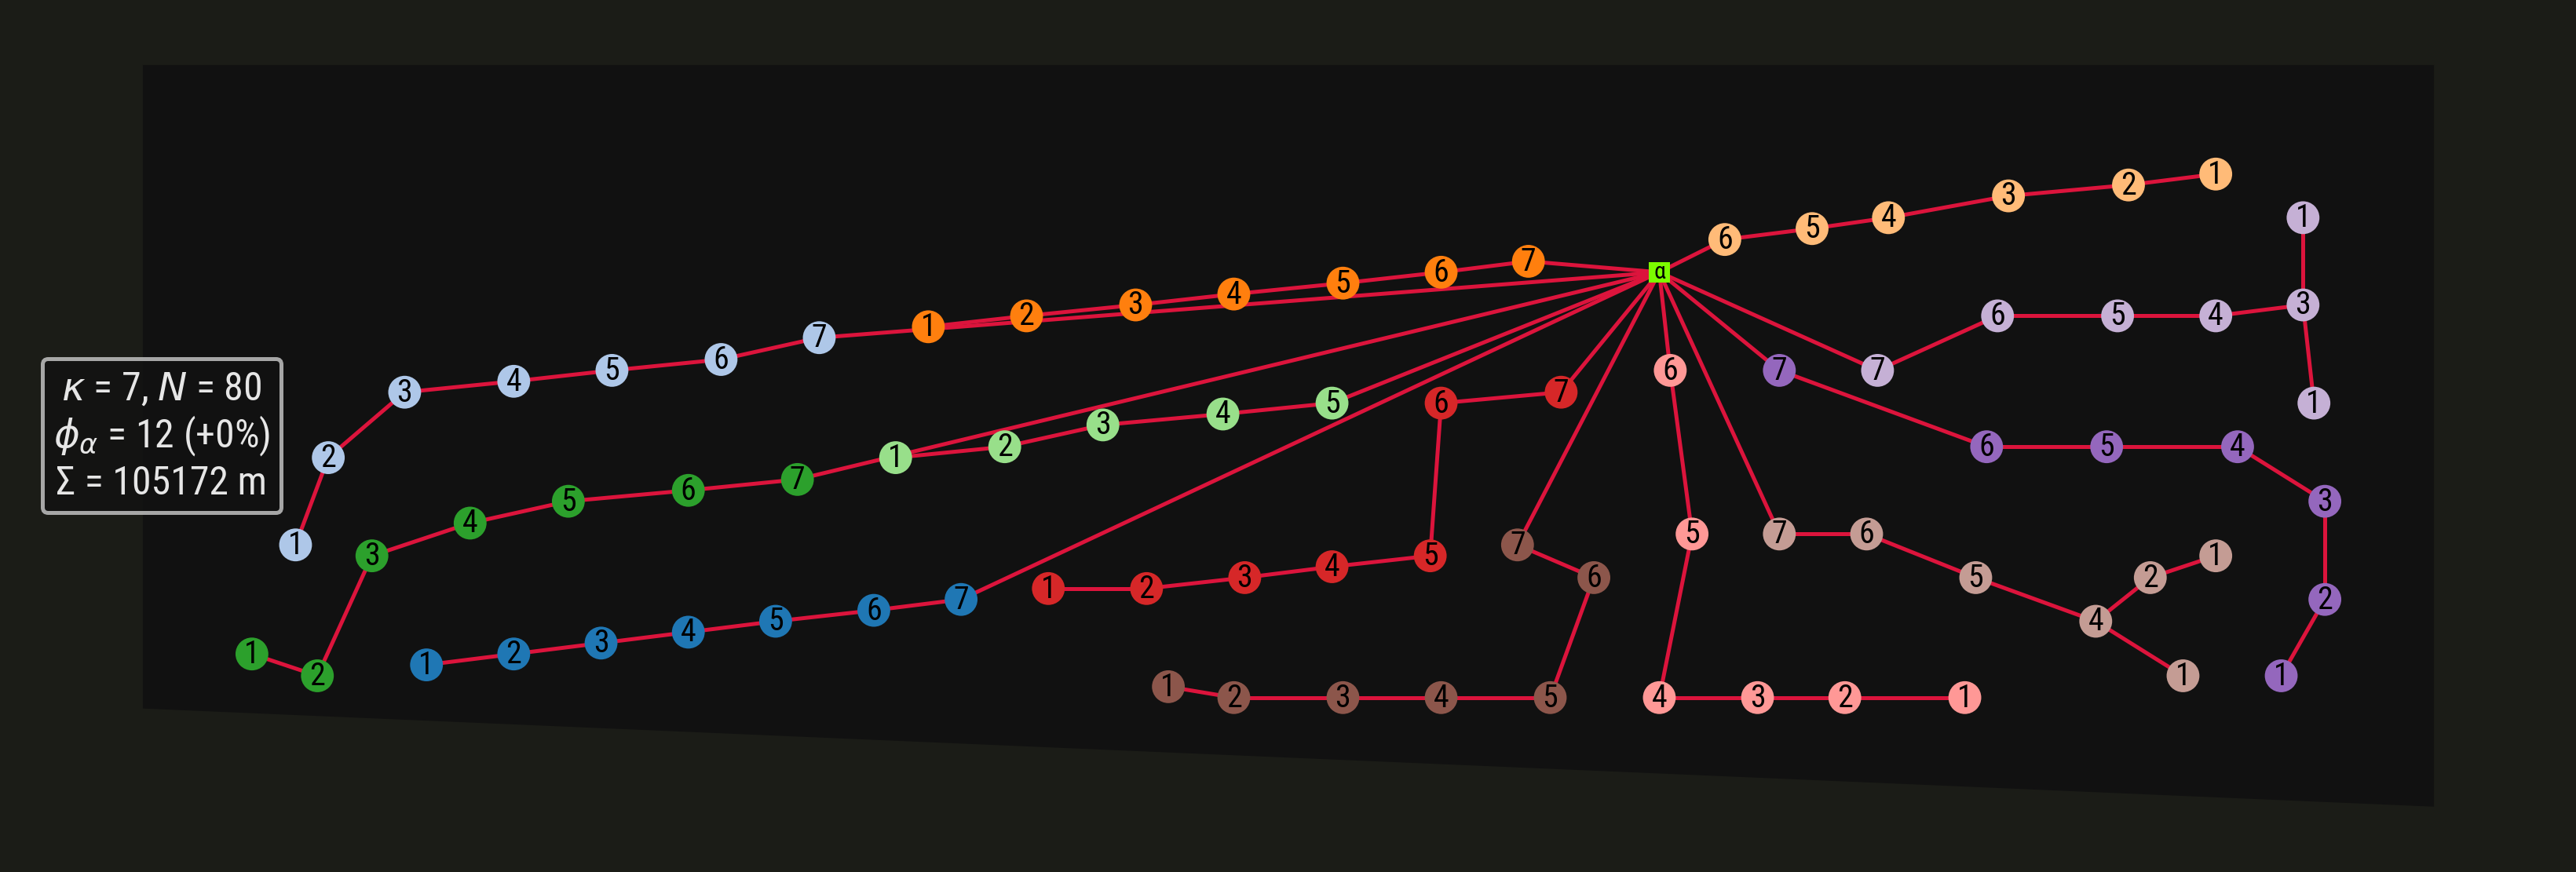

In [15]:
G = MILP_solution_to_G(solver, m, A)
gplot(G);

## dantysk, k = 7

In [16]:
G_base = g.dantysk

In [17]:
k = 7
A = A_graph(G_base)
m = make_MILP_length(A, k, 
                     gateXings_constraint = True,
                     gates_limit = True,
                     branching = False)

In [18]:
solver = cp_model.CpSolver()

In [22]:
# https://github.com/google/or-tools/blob/stable/ortools/sat/sat_parameters.proto
# solver.parameters.log_search_progress = True
# solver.parameters.num_search_workers = 16
solver.parameters.max_time_in_seconds = 60
solver.parameters.relative_gap_limit = 0.01
# solver.parameters.hint_conflict_limit = 50000
# solver.parameters.cp_model_probing_level = 4
# solver.parameters.max_presolve_iterations = 12

In [23]:
status = solver.Solve(m)
print(solver.ResponseStats(), solver.SolutionInfo())

CpSolverResponse summary:
status: FEASIBLE
objective: 108255.1210144359
best_bound: 99756.78917083454
integers: 799
booleans: 1392
conflicts: 1477
branches: 8182
propagations: 110803
integer_propagations: 154402
restarts: 2030
lp_iterations: 205857
walltime: 60.0867
usertime: 60.0867
deterministic_time: 361.546
gap_integral: 3297.38
solution_fingerprint: 0x2bf6cd8858f74ba
 quick_restart_no_lp


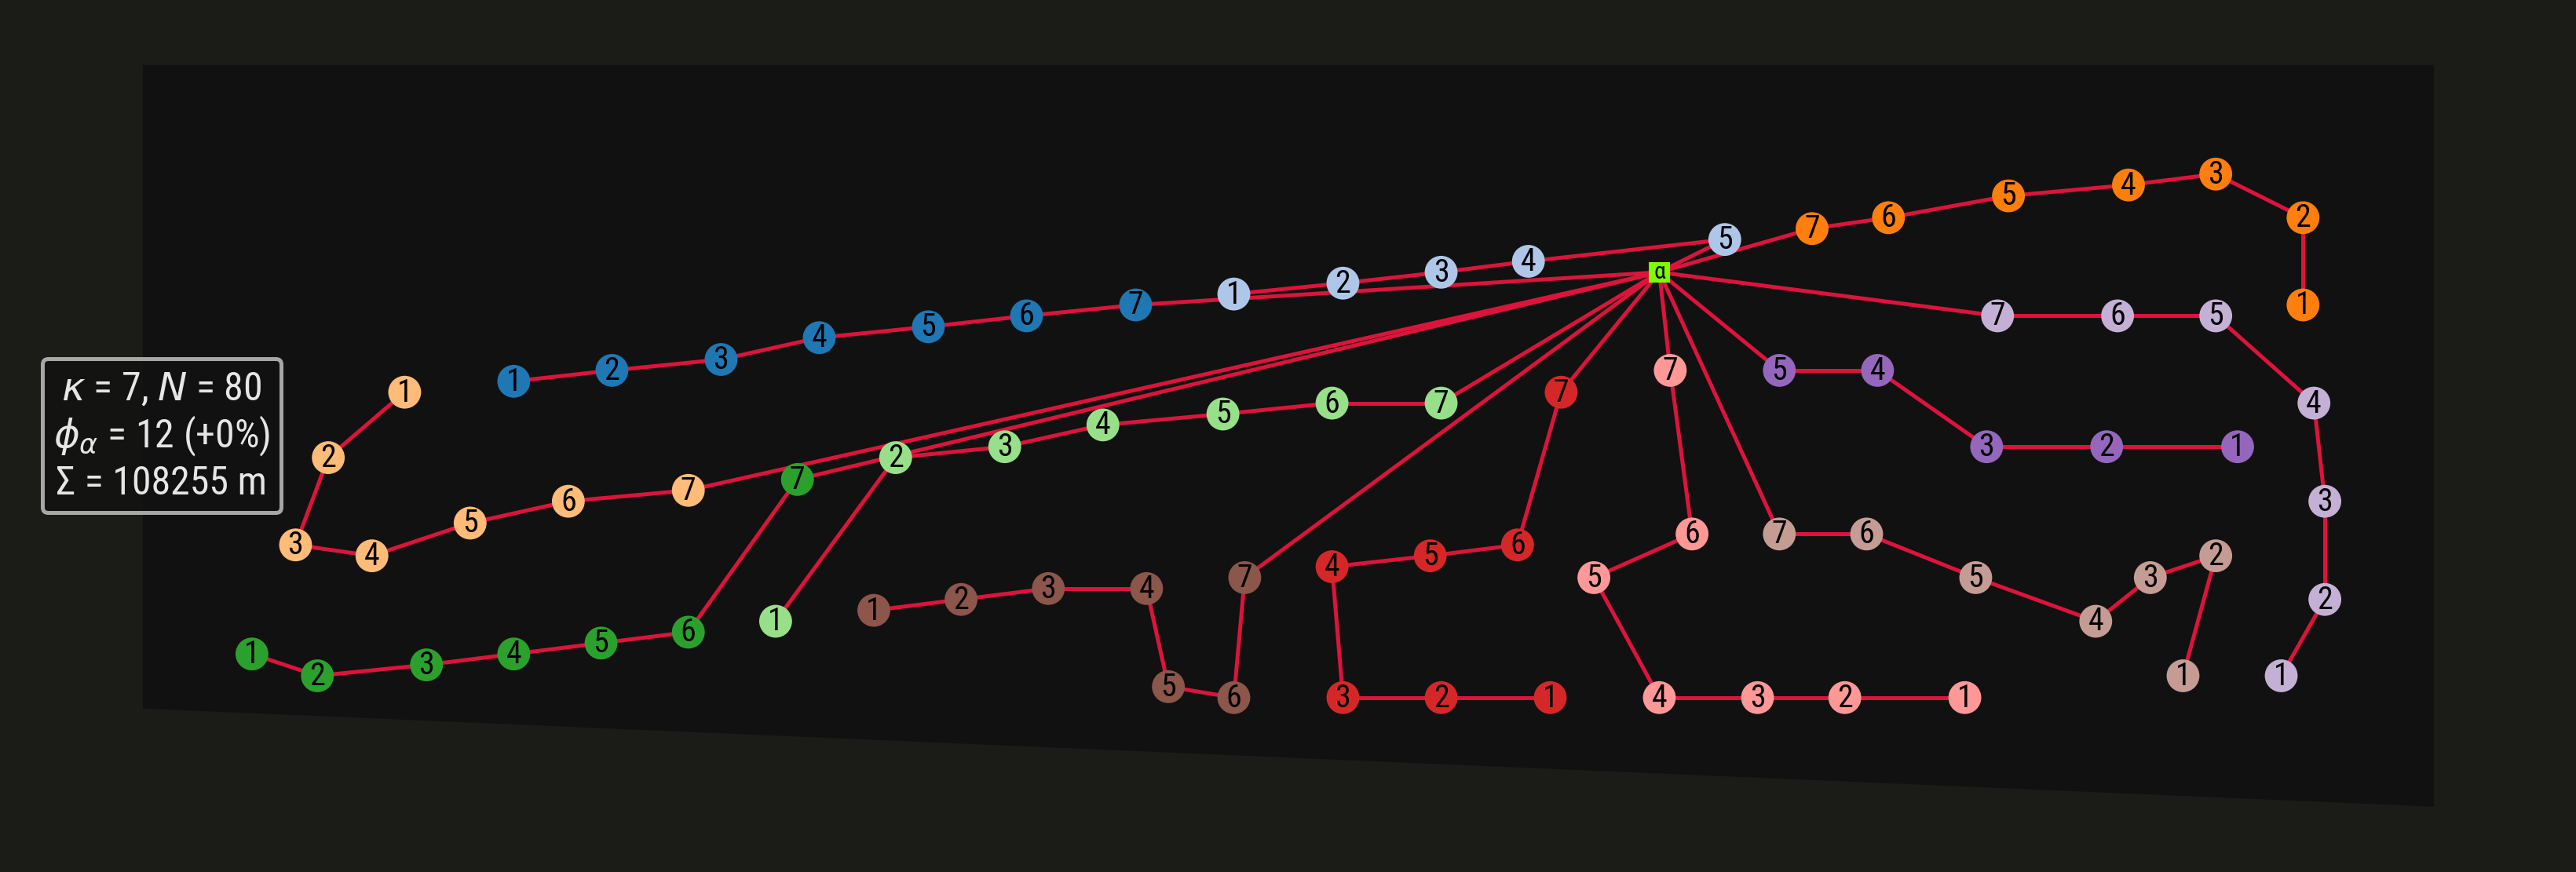

In [24]:
G = MILP_solution_to_G(solver, m, A)
gplot(G);

In [33]:
print(solver.ResponseStats(),
      f"\nbest solution's strategy: {solver.SolutionInfo()}",
      f'\ngap: {100*(solver.ObjectiveValue() - solver.BestObjectiveBound())/solver.BestObjectiveBound():.1f}%')

CpSolverResponse summary:
status: FEASIBLE
objective: 108255.1210144359
best_bound: 99756.78917083454
integers: 799
booleans: 1392
conflicts: 1477
branches: 8182
propagations: 110803
integer_propagations: 154402
restarts: 2030
lp_iterations: 205857
walltime: 60.0867
usertime: 60.0867
deterministic_time: 361.546
gap_integral: 3297.38
solution_fingerprint: 0x2bf6cd8858f74ba
 
best solution's strategy: quick_restart_no_lp 
gap: 8.5%


## anholt, k = 9

In [40]:
G_base = g.anholt

In [41]:
k = 9
A = A_graph(G_base)
m = make_MILP_length(A, k, 
                     gateXings_constraint = True,
                     gates_limit = True,
                     branching = False)

In [42]:
solver = cp_model.CpSolver()

In [43]:
# https://github.com/google/or-tools/blob/stable/ortools/sat/sat_parameters.proto
# solver.parameters.log_search_progress = True
# solver.parameters.num_search_workers = 16
solver.parameters.max_time_in_seconds = 60
solver.parameters.relative_gap_limit = 0.01
# solver.parameters.hint_conflict_limit = 50000
# solver.parameters.cp_model_probing_level = 4
# solver.parameters.max_presolve_iterations = 12

In [44]:
status = solver.Solve(m)
print(solver.ResponseStats(), solver.SolutionInfo())

CpSolverResponse summary:
status: FEASIBLE
objective: 160406.2246800222
best_bound: 131712.6320425892
integers: 1036
booleans: 1778
conflicts: 997
branches: 8031
propagations: 65920
integer_propagations: 92015
restarts: 2576
lp_iterations: 148594
walltime: 60.1917
usertime: 60.1917
deterministic_time: 281.268
gap_integral: 2937.11
solution_fingerprint: 0xffc64ce78f74b5a5
 rnd_cst_lns_default(d=0.75 s=457 t=0.10 p=0.52)


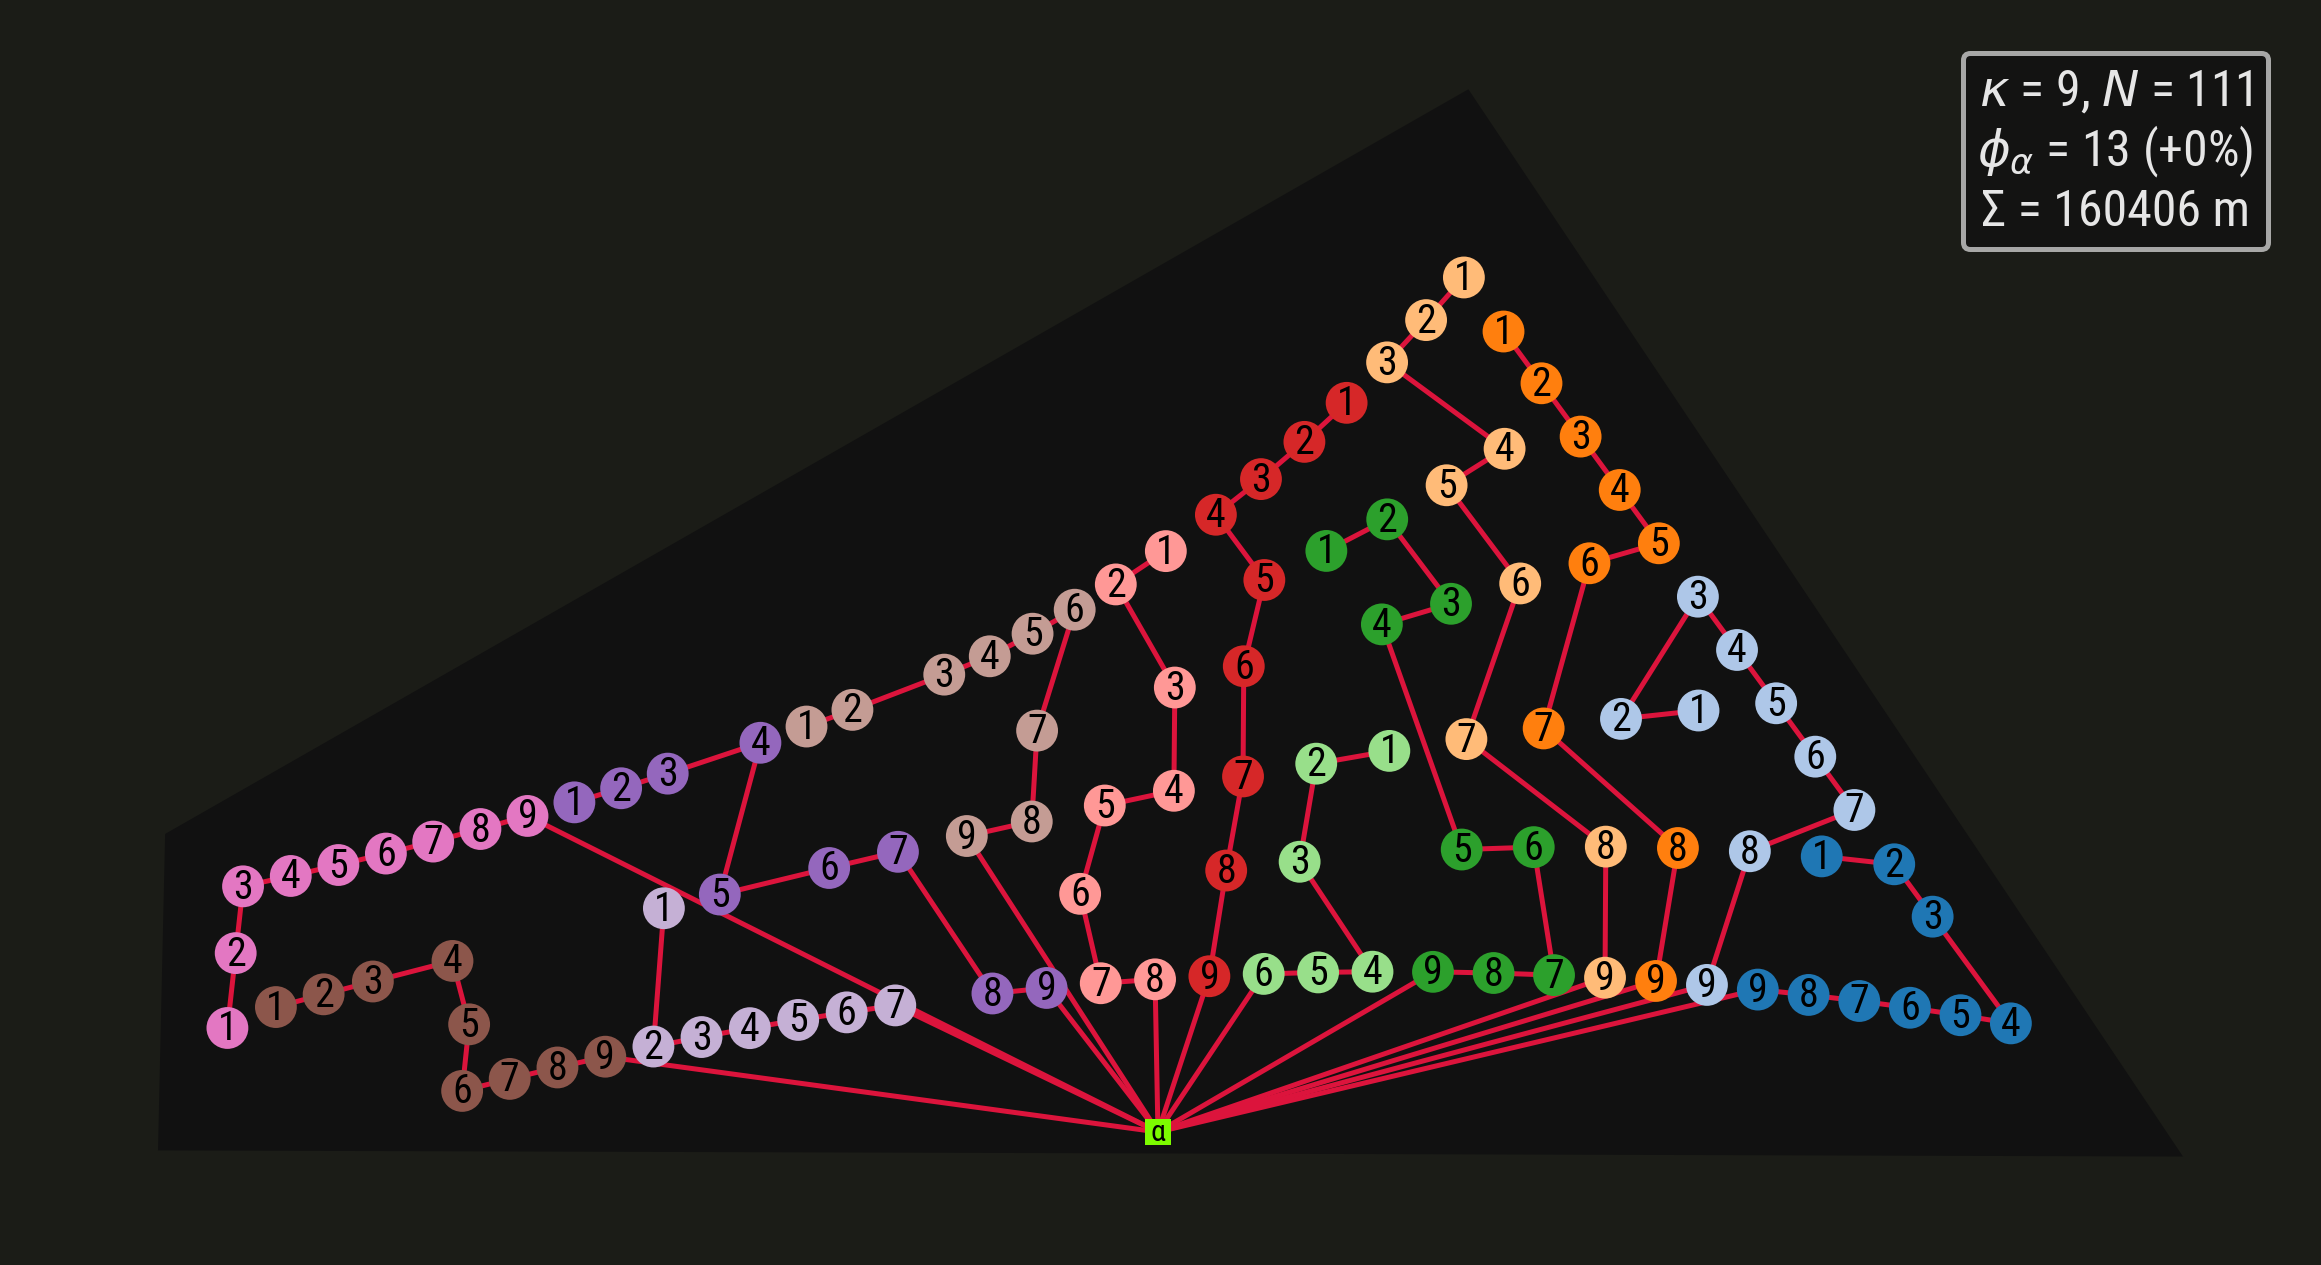

In [45]:
G = MILP_solution_to_G(solver, m, A)
gplot(G);

## anholt, k = 9, no gateXings

In [46]:
G_base = g.anholt

In [47]:
k = 9
A = A_graph(G_base)
m = make_MILP_length(A, k, 
                     gateXings_constraint = False,
                     gates_limit = True,
                     branching = False)

In [48]:
solver = cp_model.CpSolver()

In [49]:
# https://github.com/google/or-tools/blob/stable/ortools/sat/sat_parameters.proto
# solver.parameters.log_search_progress = True
# solver.parameters.num_search_workers = 16
solver.parameters.max_time_in_seconds = 60
solver.parameters.relative_gap_limit = 0.01
# solver.parameters.hint_conflict_limit = 50000
# solver.parameters.cp_model_probing_level = 4
# solver.parameters.max_presolve_iterations = 12

In [50]:
status = solver.Solve(m)
print(solver.ResponseStats(),
      f"\nbest solution's strategy: {solver.SolutionInfo()}",
      f'\ngap: {100*(solver.ObjectiveValue() - solver.BestObjectiveBound())/solver.BestObjectiveBound():.1f}%')

CpSolverResponse summary:
status: FEASIBLE
objective: 157385.810878392
best_bound: 131771.4889046495
integers: 1038
booleans: 2029
conflicts: 2135
branches: 15711
propagations: 109387
integer_propagations: 140273
restarts: 2588
lp_iterations: 205815
walltime: 60.202
usertime: 60.202
deterministic_time: 329.392
gap_integral: 3620.93
solution_fingerprint: 0x42e609a755a5fb35
 
best solution's strategy: quick_restart_no_lp 
gap: 19.4%


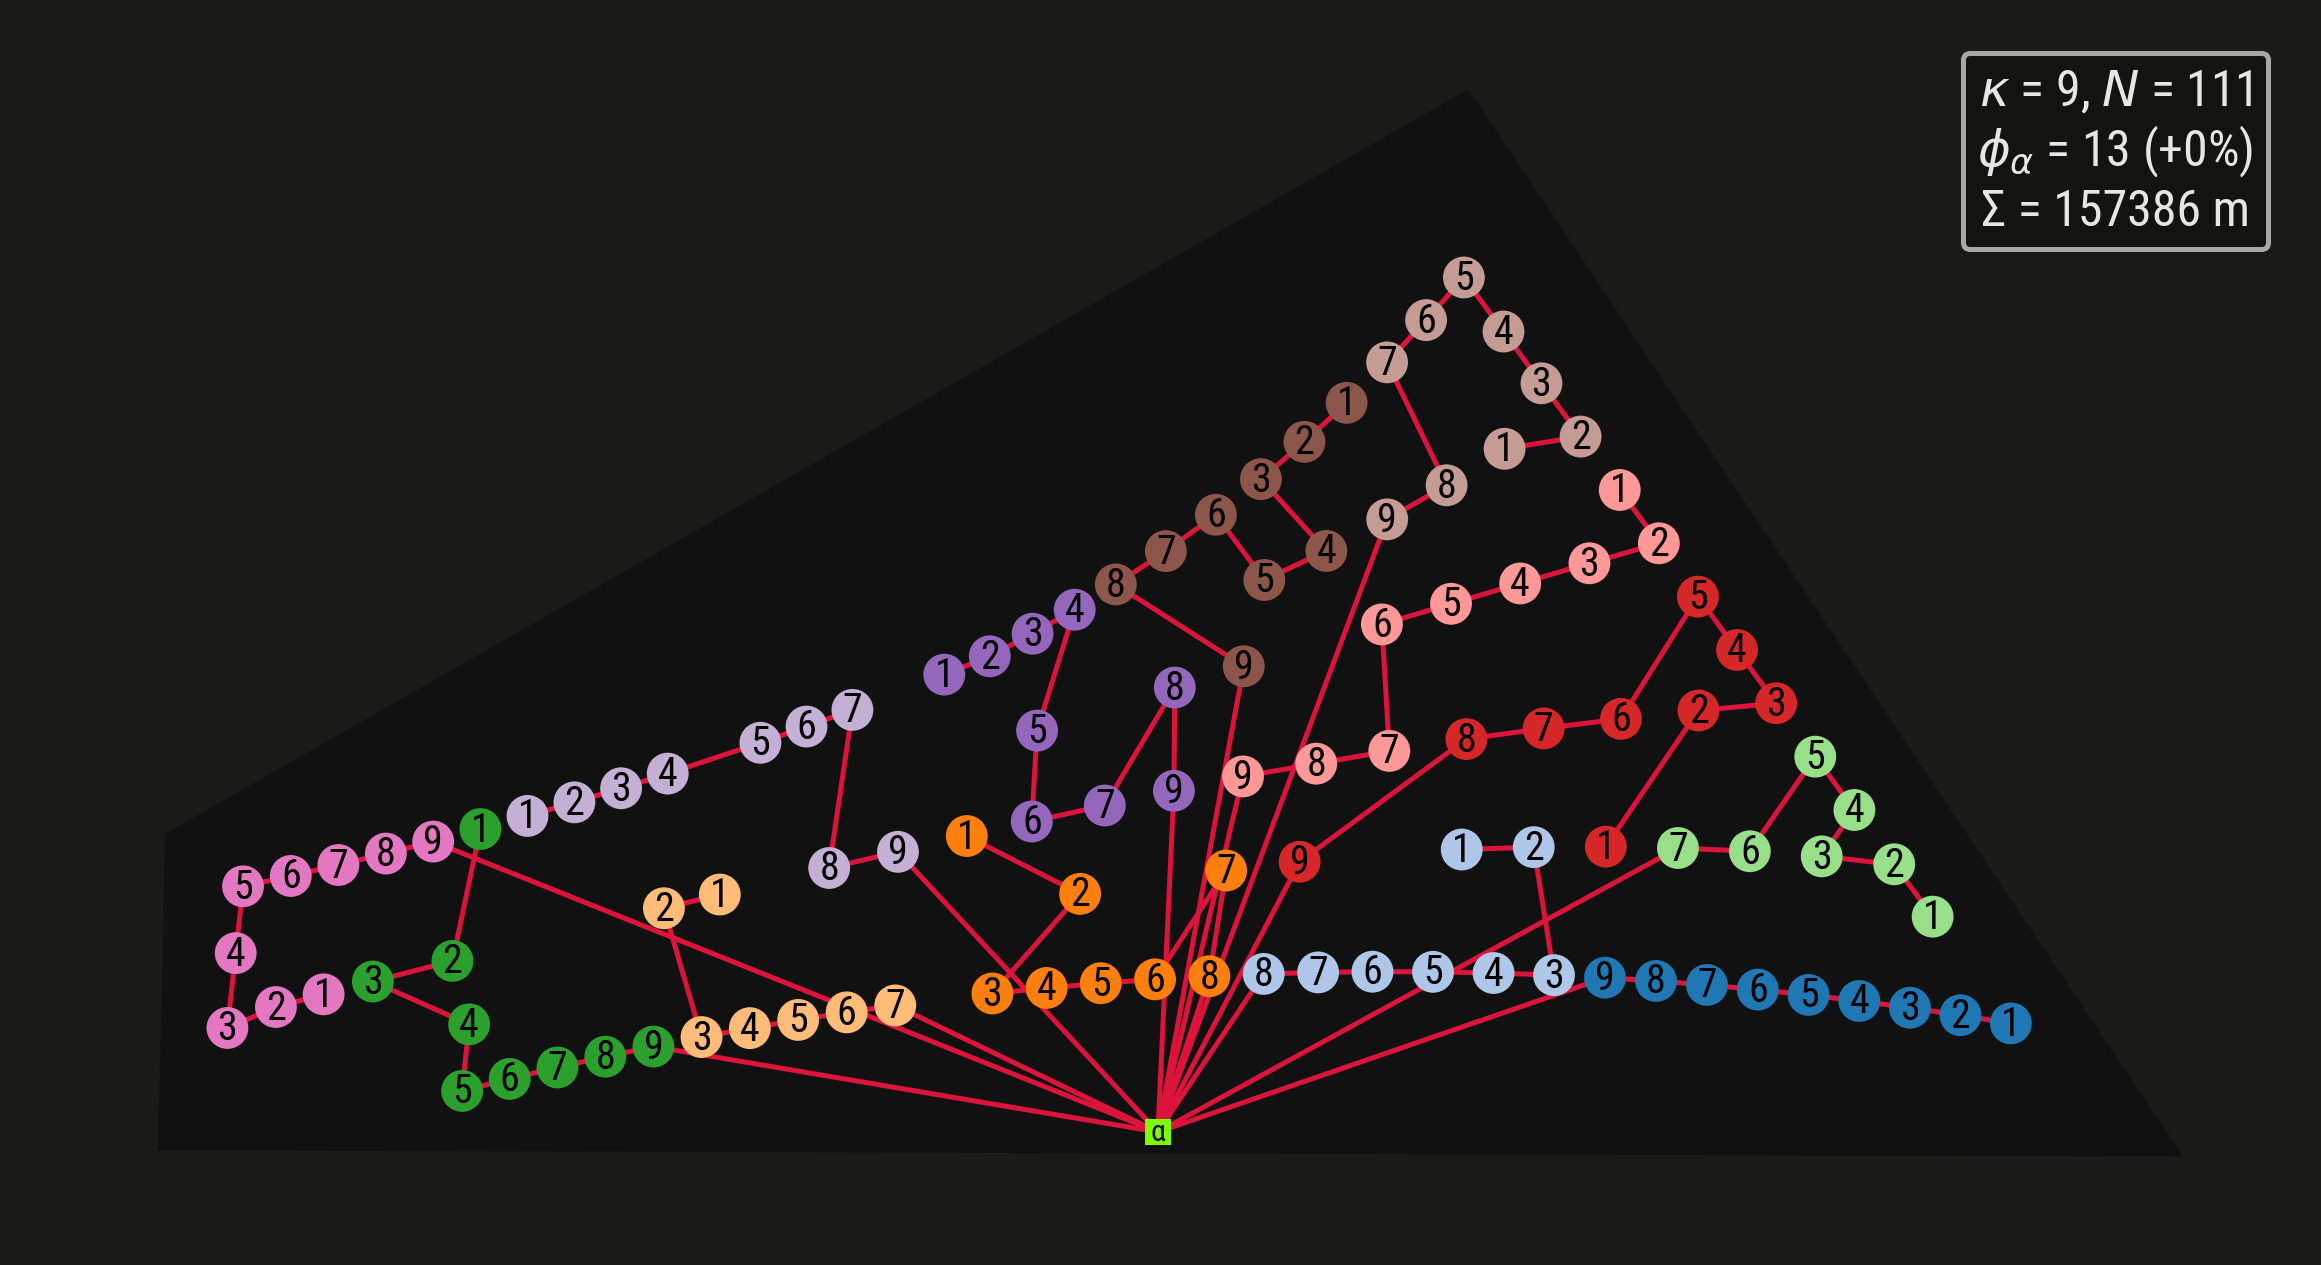

In [51]:
G = MILP_solution_to_G(solver, m, A)
gplot(G);